In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
import numpy as np
from datetime import datetime

def computeDistance(startPoint, endPoint):
    return np.sqrt(((startPoint[0]-endPoint[0])**2)+((startPoint[1]-endPoint[1])**2))

def getSideFromRadius(Radius):
    
#     scale_factor = 1144/33.4772
    scale_factor = (955 - 130)/33.4772
    # 2m is the approximated distance of waist to drop ceiling for all participants.
    # 1144/33.4772 was emprically found to convert distances in real world to pixel distances.
    # It is function of input image/map resoloution.
    
    ceilingToWaist = 2 * scale_factor
    
    return int(np.sqrt(np.abs((Radius**2)-(ceilingToWaist**2))))


def getRoom(Loc):

    x=Loc[0]
    y=Loc[1]

    if 200 < x < 430 and 310 < y < 920:
        room = "ActivityArea"

    elif 550 < x < 750 and 200 < y < 950:
        room = 'LC'

    elif 1060 < x < 1260 and 200 < y < 950:
        room = 'RC'    

    elif 600 < x < 1210 and 130 < y < 200:
        room = 'Kitchen' 

    elif 750 < x <= 1260 and 680 < y < 800:
        room='Lounge'

    elif 1400 < x < 1480 and 320 < y < 730:
        room='Staff Zone'  

    else:
        room='Transition Zones'

    return room

In [47]:
dfs = []
fname = '/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/BLE_DATA_July_02_2.csv'

data = pd.read_csv(fname, sep=",", header=None, names=["Time", "ID", "RSSI", "PI"])

In [48]:
dfs.append(data.copy())
dfs = pd.concat(dfs)
dfs = dfs.reset_index(drop=True)
#dfs_sorted = dfs.sort_values(dfs.columns[0], ascending=True)
dfs_sorted = dfs
dfs_sorted

,Time,ID,RSSI,PI
0,Time,ID,RSSI,PI
1,1719918060.1235244,d4:13:5c:c3:7e:36,-79,163
2,1719918061.1547215,d4:13:5c:c3:7e:36,-79,163
3,1719918070.1579015,d4:13:5c:c3:7e:36,-79,163
4,1719918075.2962327,d4:13:5c:c3:7e:36,-86,124
...,...,...,...,...
3974,1719973219.9966464,d4:13:5c:c3:7e:36,-84,133
3975,1719973697.4632826,d4:13:5c:c3:7e:36,-81,133
3976,1719974572.1522548,d4:13:5c:c3:7e:36,-84,133
3977,1719975290.130477,d4:13:5c:c3:7e:36,-85,133


In [44]:
dfs_sorted[dfs_sorted['PI'] == '108']

,Time,ID,RSSI,PI
3803,1719952545.148139,d4:13:5c:c3:7e:36,-72,108
3804,1719952553.189721,d4:13:5c:c3:7e:36,-69,108
3806,1719952573.2945874,d4:13:5c:c3:7e:36,-69,108
3807,1719952575.3147995,d4:13:5c:c3:7e:36,-69,108
3808,1719952582.3552854,d4:13:5c:c3:7e:36,-78,108
3809,1719952584.3796766,d4:13:5c:c3:7e:36,-75,108
3810,1719952589.374288,d4:13:5c:c3:7e:36,-81,108
3811,1719952599.4242828,d4:13:5c:c3:7e:36,-70,108
3812,1719952602.4477224,d4:13:5c:c3:7e:36,-73,108
3814,1719952614.497385,d4:13:5c:c3:7e:36,-79,108


In [37]:
#i=5 #starting at 7
x=-20
dfs_sorted.iloc[3500+x:3510+x]

,Time,ID,RSSI,PI
3480,1719949860.2326949,d4:13:5c:c3:7e:36,-78,133
3481,1719949861.5338826,d4:13:5c:c3:7e:36,-81,106
3482,1719949866.5253124,d4:13:5c:c3:7e:36,-82,106
3483,1719949867.2588573,d4:13:5c:c3:7e:36,-82,133
3484,1719949867.5312486,d4:13:5c:c3:7e:36,-81,106
3485,1719949869.0820637,d4:13:5c:c3:7e:36,-75,163
3486,1719949869.5300806,d4:13:5c:c3:7e:36,-83,106
3487,1719949881.6069586,d4:13:5c:c3:7e:36,-82,106
3488,1719949898.322168,d4:13:5c:c3:7e:36,-78,124
3489,1719949908.4865272,d4:13:5c:c3:7e:36,-78,133


In [49]:
dfs_sorted.drop(dfs_sorted.head(1).index,inplace=True)
dfs_sorted

,Time,ID,RSSI,PI
1,1719918060.1235244,d4:13:5c:c3:7e:36,-79,163
2,1719918061.1547215,d4:13:5c:c3:7e:36,-79,163
3,1719918070.1579015,d4:13:5c:c3:7e:36,-79,163
4,1719918075.2962327,d4:13:5c:c3:7e:36,-86,124
5,1719918076.184579,d4:13:5c:c3:7e:36,-79,163
...,...,...,...,...
3974,1719973219.9966464,d4:13:5c:c3:7e:36,-84,133
3975,1719973697.4632826,d4:13:5c:c3:7e:36,-81,133
3976,1719974572.1522548,d4:13:5c:c3:7e:36,-84,133
3977,1719975290.130477,d4:13:5c:c3:7e:36,-85,133


In [98]:
i=3 
dfs_sorted.iloc[i*0:(i+1)*20]

,Time,ID,RSSI,PI
1,1.719949e+09,de:28:8e:55:25:67,-68,106
2,1.719949e+09,de:28:8e:55:25:67,-81,150
3,1.719949e+09,de:28:8e:55:25:67,-67,106
4,1.719949e+09,de:28:8e:55:25:67,-79,153
5,1.719949e+09,de:28:8e:55:25:67,-80,148
...,...,...,...,...
76,1.719949e+09,de:28:8e:55:25:67,-75,153
77,1.719949e+09,de:28:8e:55:25:67,-77,153
78,1.719949e+09,de:28:8e:55:25:67,-81,148
79,1.719949e+09,de:28:8e:55:25:67,-73,106


In [45]:
import pytz
from datetime import datetime

def get_est_time_timestamp(epoch, tz="GMT"):
    #print(int(epoch))
    tz = pytz.timezone(tz)
    
    dt = datetime.fromtimestamp(epoch)
    dt = tz.localize(dt)

    est_tz = pytz.timezone("US/Eastern") 
    new_dt = dt.astimezone(est_tz)

    return datetime.timestamp(new_dt)

In [50]:
# Convert the 'Time_loc' column to EST timestamps
dfs_sorted['Time_loc_EST'] = dfs_sorted['Time'].apply(lambda x: get_est_time_timestamp(int(float(x)), tz="GMT"))

print(dfs_sorted)

                    Time                 ID RSSI   PI  Time_loc_EST
1     1719918060.1235244  d4:13:5c:c3:7e:36  -79  163  1.719904e+09
2     1719918061.1547215  d4:13:5c:c3:7e:36  -79  163  1.719904e+09
3     1719918070.1579015  d4:13:5c:c3:7e:36  -79  163  1.719904e+09
4     1719918075.2962327  d4:13:5c:c3:7e:36  -86  124  1.719904e+09
5      1719918076.184579  d4:13:5c:c3:7e:36  -79  163  1.719904e+09
...                  ...                ...  ...  ...           ...
3974  1719973219.9966464  d4:13:5c:c3:7e:36  -84  133  1.719959e+09
3975  1719973697.4632826  d4:13:5c:c3:7e:36  -81  133  1.719959e+09
3976  1719974572.1522548  d4:13:5c:c3:7e:36  -84  133  1.719960e+09
3977   1719975290.130477  d4:13:5c:c3:7e:36  -85  133  1.719961e+09
3978  1719975549.4900806  d4:13:5c:c3:7e:36  -85  133  1.719961e+09

[3978 rows x 5 columns]


In [51]:
dfs_sorted['Time_loc_EST'] = pd.to_datetime(dfs_sorted['Time_loc_EST'],unit='s')
dfs_sorted

,Time,ID,RSSI,PI,Time_loc_EST
1,1719918060.1235244,d4:13:5c:c3:7e:36,-79,163,2024-07-02 07:01:00
2,1719918061.1547215,d4:13:5c:c3:7e:36,-79,163,2024-07-02 07:01:01
3,1719918070.1579015,d4:13:5c:c3:7e:36,-79,163,2024-07-02 07:01:10
4,1719918075.2962327,d4:13:5c:c3:7e:36,-86,124,2024-07-02 07:01:15
5,1719918076.184579,d4:13:5c:c3:7e:36,-79,163,2024-07-02 07:01:16
...,...,...,...,...,...
3974,1719973219.9966464,d4:13:5c:c3:7e:36,-84,133,2024-07-02 22:20:19
3975,1719973697.4632826,d4:13:5c:c3:7e:36,-81,133,2024-07-02 22:28:17
3976,1719974572.1522548,d4:13:5c:c3:7e:36,-84,133,2024-07-02 22:42:52
3977,1719975290.130477,d4:13:5c:c3:7e:36,-85,133,2024-07-02 22:54:50


In [60]:
dfs_sorted.iloc[3486:3496]   #3390

,Time,ID,RSSI,PI,Time_loc_EST
3487,1719949881.6069586,d4:13:5c:c3:7e:36,-82,106,2024-07-02 15:51:21
3488,1719949898.322168,d4:13:5c:c3:7e:36,-78,124,2024-07-02 15:51:38
3489,1719949908.4865272,d4:13:5c:c3:7e:36,-78,133,2024-07-02 15:51:48
3490,1719949916.5563133,d4:13:5c:c3:7e:36,-78,133,2024-07-02 15:51:56
3491,1719949927.5852334,d4:13:5c:c3:7e:36,-80,133,2024-07-02 15:52:07
3492,1719949936.488304,d4:13:5c:c3:7e:36,-73,163,2024-07-02 15:52:16
3493,1719950050.3078165,d4:13:5c:c3:7e:36,-80,133,2024-07-02 15:54:10
3494,1719950072.4556446,d4:13:5c:c3:7e:36,-80,133,2024-07-02 15:54:32
3495,1719950161.6161237,d4:13:5c:c3:7e:36,-83,115,2024-07-02 15:56:01
3496,1719950217.2220385,d4:13:5c:c3:7e:36,-78,133,2024-07-02 15:56:57


In [40]:
sliced_df = dfs_sorted.iloc[3480:3846] 

# Save the sliced DataFrame to a CSV file
sliced_df.to_csv('/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/BLE_DATA_July_02_2_slice_final.csv', index=False)


In [89]:
import pandas as pd
import numpy as np

from itertools import permutations


def locator(BLE_DATA):
    """You need to pass a dataframe into the form of Time (timestamp form),
    ID, RSSi and PI value into the locator function. The locator function
    returns a dataframe with location, rooms and the time at that location

    Args:
        BLE_DATA (pd.DataFrame): input DataFrame containing bluetooth hits data

    Returns:
        (pd.DataFrame): final locations DataFrame
    """

    # The selected hyperparameters are as follows based on our grid search optimization technique
    startTime = BLE_DATA["Time"].tolist()[0]
    endTime = BLE_DATA["Time"].tolist()[-2]

    startTime = float(startTime)
    endTime = float(endTime)
    # Loading Pi X and Y Locations on Map
    locations = np.loadtxt(
        "PiLocations.csv",
        delimiter=",",
        dtype={"names": ("Pi", "X", "Y"), "formats": ("i", "i", "i")},
        skiprows=1,
    )
    Locations = {}

    for location in locations:
        Locations[location[0]] = (location[1], location[2])

    tframe = 25  # 5s was selected as the window length
    nextp = startTime + tframe
    sTime = startTime
    location = []
    Time_loc = []
    rooms = []
    path_x = []
    path_y = []

    NPT = []
    NHT = []

    scale_factor = (955 - 130) / 33.4772

    dataframe = []

    while nextp <= endTime:
        temp = BLE_DATA[(BLE_DATA["Time"] >= sTime) & (BLE_DATA["Time"] <= nextp)]

        # Choose the moving type to be slide(1)/step(2)

        # The best method based on the hyperparameter tuning was the step method so we can put SS = 2
        # Also the best weight set was S6 which is provided below

        W = [0.7, 0.3, 0.0]
        w1, w2, w3 = W[0], W[1], W[2]

        RHSI_METHOD = 1
        SS = 2

        if SS == 1:
            sTime = sTime + 1
            nextp = sTime + tframe

        else:
            sTime = sTime + tframe
            nextp = nextp + tframe

        numberOfCircles = 0
        radii = []
        RADIUSINM = []

        HitPiIDs, NumOfHits = np.unique(temp["PI"], return_counts=True)
        # print(f"Hit Pi IDs = {HitPiIDs}")
        N = 3.5  # N = 3.5 is a function of environment (Hyperparameter)

        NP = len(HitPiIDs)  # number of Pi's

        if NP == 0:
            NH = 0  # max number of hits
        else:
            NH = np.max(NumOfHits)

        for PiID in HitPiIDs:
            RSSI = temp[temp["PI"] == PiID].RSSI.mean()
            radiusInM = 10 ** (
                (-73 - RSSI) / (10 * N)
            )  # You hard code the M1RSSI into -73dbm

            if radiusInM > 10:
                radiusInM = 10

            RADIUSINM.append(radiusInM)
            radii.append(getSideFromRadius(int(radiusInM * scale_factor)))

        radii = np.array(radii)

        if len(HitPiIDs) == 0:
            # (1160,405) modified to nan - it does not make sense to initialize randomly when there is no information
            center_coordinates =  (np.nan, np.nan)#(1160, 405)
            # print("HitPiIDs is 0")
            # center_coordinates = (np.nan, np.nan)

        if len(HitPiIDs) == 1:
            Pi = int(PiID)
            X, Y = Locations[Pi]
            center_coordinates = (int(X * 1830 / 2432), int(Y * 1167 / 1632))
            radius = radii[0]

        if len(HitPiIDs) > 1:
            perm = permutations(range(0, len(HitPiIDs)), 2)
            perm = list(perm)
            estimatedLocation = np.zeros((len(perm), 2))
            weight = np.zeros(len(perm))

            # Method 1 -- RHSI-Agg: Method number: 0

            if RHSI_METHOD == 0:
                for n, _ in enumerate(perm):
                    Pi1 = int(HitPiIDs[perm[n][0]])
                    Pi2 = int(HitPiIDs[perm[n][1]])
                    X1, Y1 = (
                        Locations[Pi1][0] * 1830 / 2432,
                        Locations[Pi1][1] * 1167 / 1632,
                    )
                    X2, Y2 = (
                        Locations[Pi2][0] * 1830 / 2432,
                        Locations[Pi2][1] * 1167 / 1632,
                    )
                    r1 = radii[perm[n][0]]
                    r2 = radii[perm[n][1]]

                    estimatedLocation[n, :] = [
                        int(X1 + (r1 / (r1 + r2)) * (X2 - X1)),
                        int(Y1 + (r1 / (r1 + r2)) * (Y2 - Y1)),
                    ]
                    weight[n] = NumOfHits[perm[n][0]] + NumOfHits[perm[n][1]]

                weighted_loc = estimatedLocation * weight[:, None]
                weighted_sum_x = np.sum(weighted_loc[:, 0]) / np.sum(weight)
                weighted_sum_y = np.sum(weighted_loc[:, 1]) / np.sum(weight)
                center_coordinates = (int(weighted_sum_x), int(weighted_sum_y))
                radius = int(1.5 * scale_factor)

            # Method 2 -- RHSI-Edge: Method number: 1
            else:
                for n in range(0, len(perm)):
                    Pi1 = int(HitPiIDs[perm[n][0]])
                    Pi2 = int(HitPiIDs[perm[n][1]])
                    X1, Y1 = (
                        Locations[Pi1][0] * 1830 / 2432,
                        Locations[Pi1][1] * 1167 / 1632,
                    )
                    X2, Y2 = (
                        Locations[Pi2][0] * 1830 / 2432,
                        Locations[Pi2][1] * 1167 / 1632,
                    )

                    weight[n] = NumOfHits[perm[n][0]] + NumOfHits[perm[n][1]]
                    r1 = getSideFromRadius(
                        int(
                            RADIUSINM[perm[n][0]]
                            * NumOfHits[perm[n][0]]
                            / weight[n]
                            * scale_factor
                        )
                    )
                    r2 = getSideFromRadius(
                        int(
                            RADIUSINM[perm[n][1]]
                            * NumOfHits[perm[n][1]]
                            / weight[n]
                            * scale_factor
                        )
                    )

                    estimatedLocation[n, :] = [
                        int(X1 + (r1 / (r1 + r2)) * (X2 - X1)),
                        int(Y1 + (r1 / (r1 + r2)) * (Y2 - Y1)),
                    ]

                weighted_loc = estimatedLocation
                weighted_sum_x = np.sum(weighted_loc[:, 0]) / len(weighted_loc[:, 0])
                weighted_sum_y = np.sum(weighted_loc[:, 1]) / len(weighted_loc[:, 1])
                center_coordinates = (int(weighted_sum_x), int(weighted_sum_y))
                radius = int(1.5 * scale_factor)

        if (np.isnan(center_coordinates[0]) == False and np.isnan(center_coordinates[1]) == False):
            if len(location) >= 2:
                if (
                    computeDistance(
                        (location[-1][0], location[-1][1]),
                        (location[-2][0], location[-2][1]),
                    )
                    != 0
                ):
                    x_MA = (
                        w1 * center_coordinates[0]
                        + w2 * location[-1][0]
                        + w3 * location[-2][0]
                    )
                    y_MA = (
                        w1 * center_coordinates[1]
                        + w2 * location[-1][1]
                        + w3 * location[-2][1]
                    )
                    center_coordinates = (x_MA, y_MA)

            location.append(center_coordinates)
            rooms.append(getRoom(center_coordinates))
            Time_loc.append(int(nextp))

    data = {"location": location, "rooms": rooms, "Time_loc": Time_loc}
        # dataframe = pd.DataFrame(data)
    dataframe.append(pd.DataFrame(data))

    return pd.concat(dataframe) if len(dataframe) > 0 else None


In [90]:

dfs_sorted["Time"] = dfs_sorted["Time"].astype(float)
dfs_sorted["RSSI"] = dfs_sorted["RSSI"].astype(int)
dataframe = locator(dfs_sorted)

<ipython-input-89-8bbbd3250384>:26: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  locations = np.loadtxt(


In [91]:
# Extracting x and y coordinates from the 'location' column
dataframe['x'] = dataframe['location'].apply(lambda loc: loc[0])
dataframe['y'] = dataframe['location'].apply(lambda loc: loc[1])

In [92]:
#dataframe

In [93]:
dataframe['Time_loc'] = pd.to_datetime(dataframe['Time_loc'],unit='ms', utc=True)
dataframe_sorted_plot = dataframe
dataframe

,location,rooms,Time_loc,x,y
0,"(278, 512)",ActivityArea,1970-01-20 21:45:48.658000+00:00,278.000000,512.000000
1,"(317, 629)",ActivityArea,1970-01-20 21:45:48.683000+00:00,317.000000,629.000000
2,"(317.0, 629.0)",ActivityArea,1970-01-20 21:45:48.708000+00:00,317.000000,629.000000
3,"(266, 475)",ActivityArea,1970-01-20 21:45:48.758000+00:00,266.000000,475.000000
4,"(275.09999999999997, 500.2)",ActivityArea,1970-01-20 21:45:48.783000+00:00,275.100000,500.200000
...,...,...,...,...,...
104,"(922.9395779834076, 567.7818557754748)",Transition Zones,1970-01-20 21:45:52.233000+00:00,922.939578,567.781856
105,"(822.1818733950222, 455.23455673264243)",Transition Zones,1970-01-20 21:45:52.258000+00:00,822.181873,455.234557
106,"(689.7545620185066, 420.0703670197927)",LC,1970-01-20 21:45:52.283000+00:00,689.754562,420.070367
107,"(643.026368605552, 355.62111010593776)",LC,1970-01-20 21:45:52.308000+00:00,643.026369,355.621110


Len of df = 109


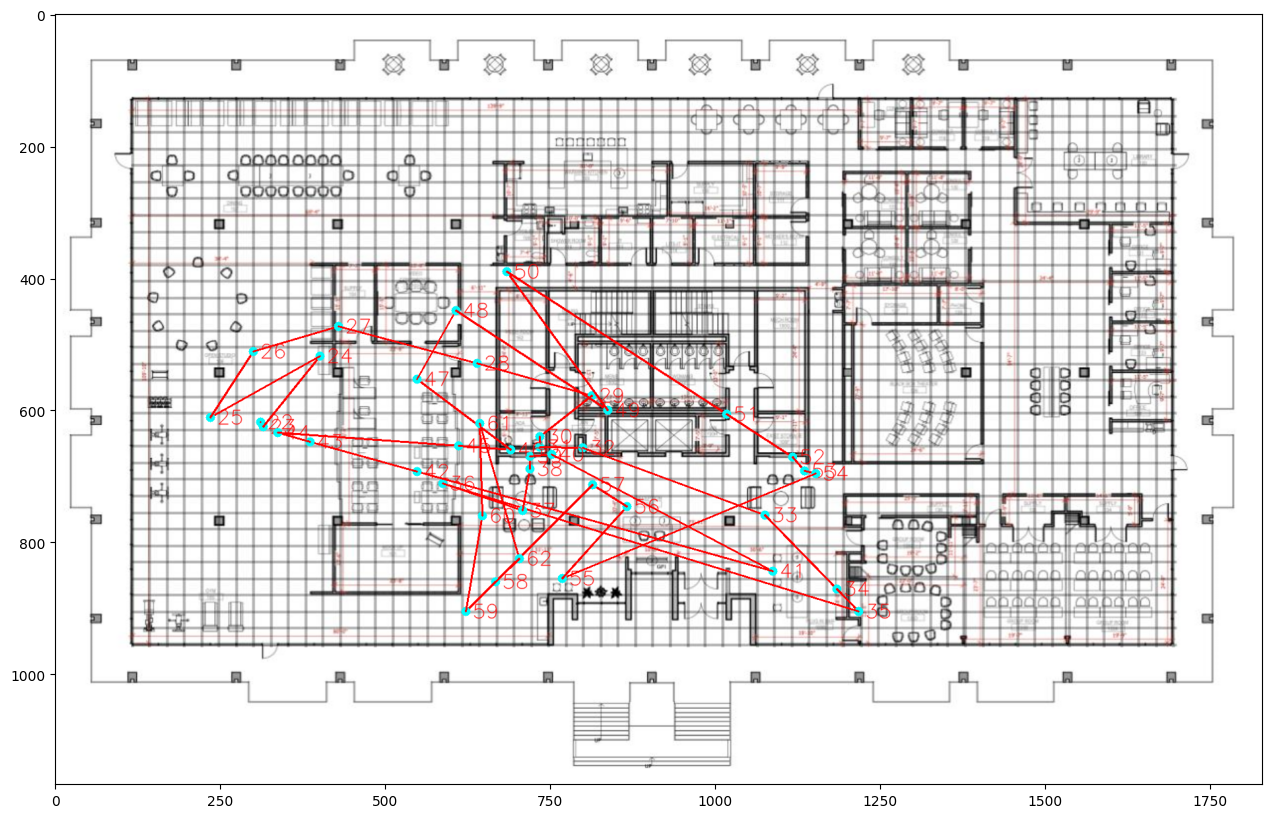

In [94]:
plot_floormap_with_tracks(dataframe_sorted_plot, og_color=[255, 0, 0], color=[0, 0, 255])

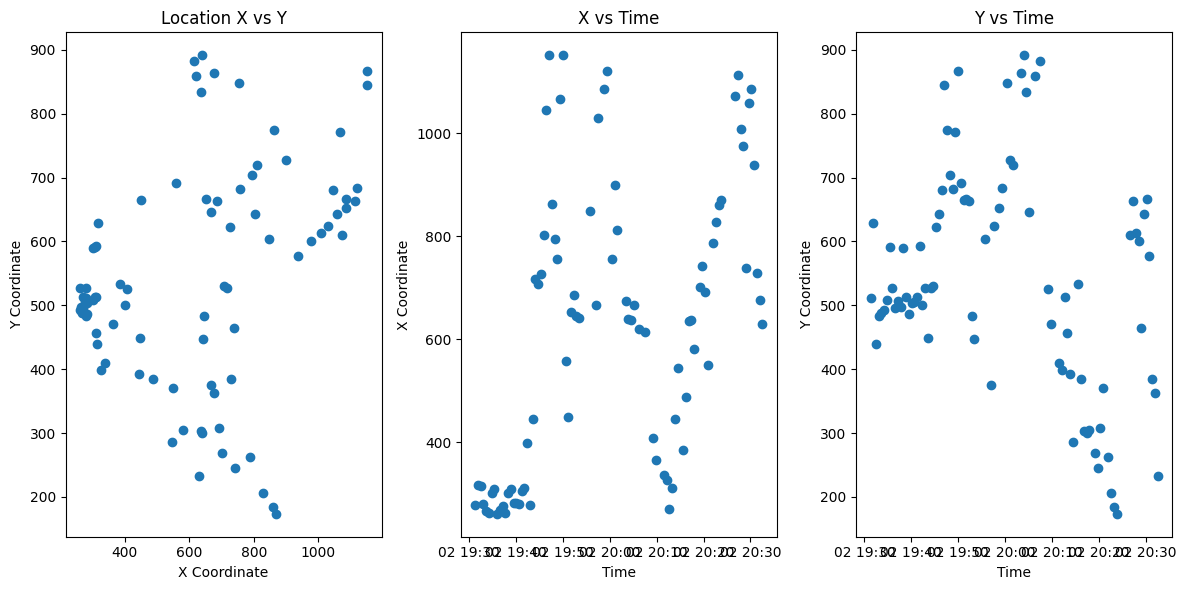

In [46]:
# Naveen 
import matplotlib.pyplot as plt
# Plot location x vs y
# Plot location x vs y
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(dataframe_sorted_plot['x'], dataframe_sorted_plot['y'])
plt.title('Location X vs Y')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Plot x vs time
plt.subplot(1, 3, 2)
plt.scatter(dataframe_sorted_plot['Time_loc'], dataframe_sorted_plot['x'])
plt.title('X vs Time')
plt.xlabel('Time')
plt.ylabel('X Coordinate')

# Plot y vs time
plt.subplot(1, 3, 3)
plt.scatter(dataframe_sorted_plot['Time_loc'], dataframe_sorted_plot['y'])
plt.title('Y vs Time')
plt.xlabel('Time')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

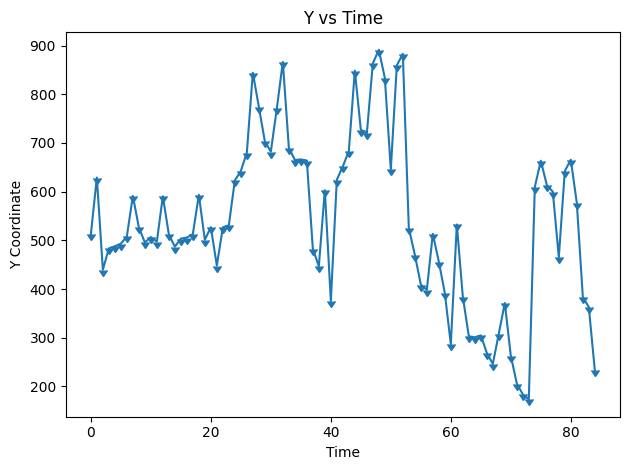

In [47]:
# # Plot y vs time
# num = -900 [551: 561]
plt.plot( dataframe_sorted_plot['y'],marker=11)
plt.title('Y vs Time')
plt.xlabel('Time')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

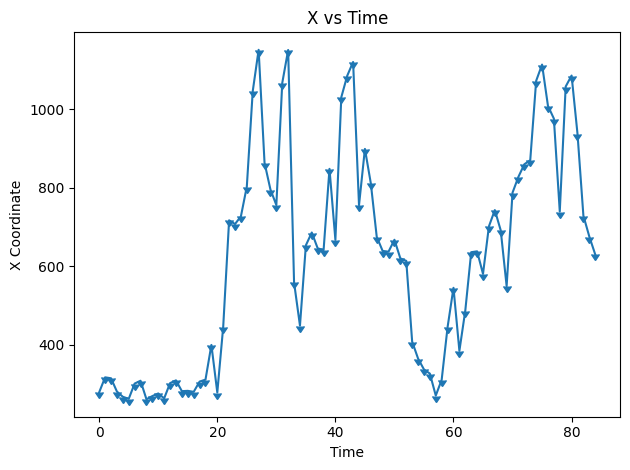

In [48]:
plt.plot( dataframe_sorted_plot['x'],marker=11)  #[551: 561]  #[445:515]  #[350:480]
plt.title('X vs Time')
plt.xlabel('Time')
plt.ylabel('X Coordinate')

plt.tight_layout()
plt.show()

<ipython-input-49-6b2954f625c9>:3: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  locations = np.loadtxt(


1830x1167


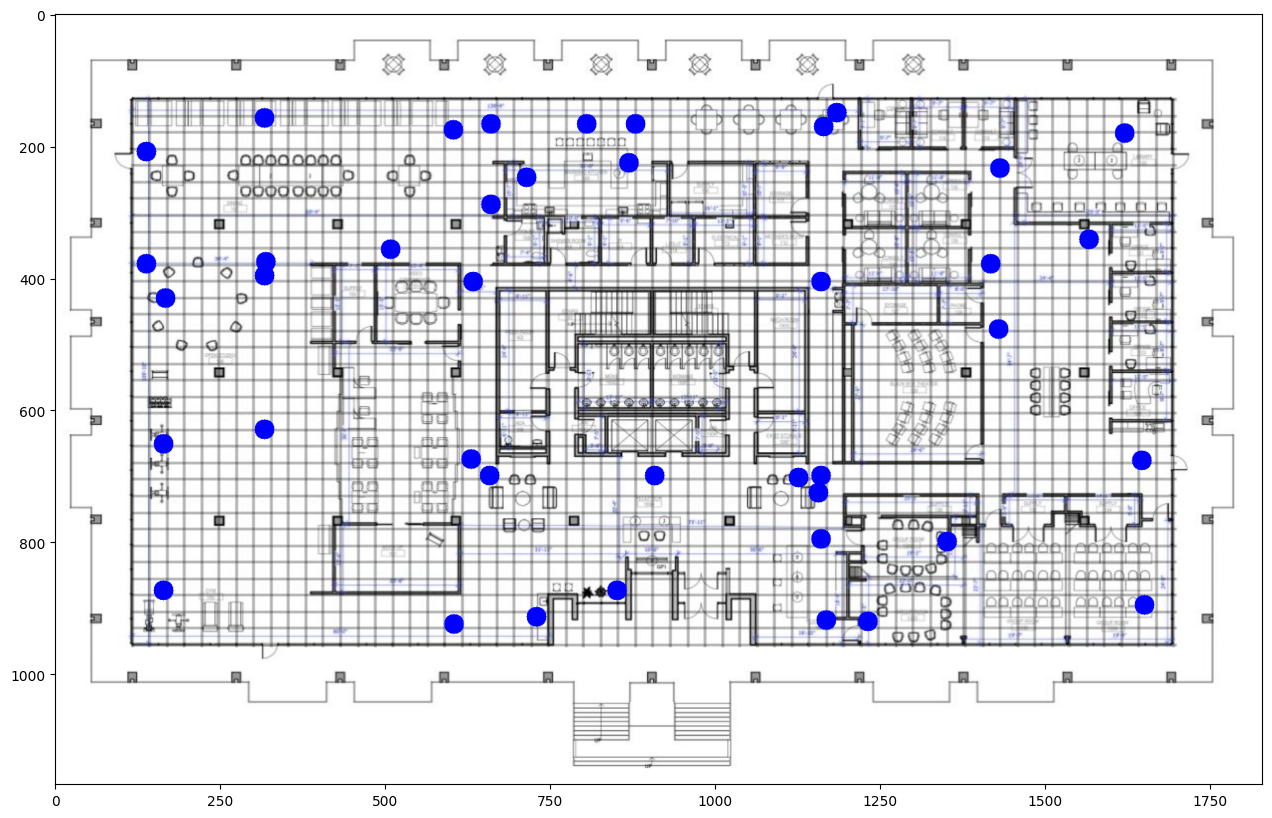

In [49]:
import cv2
# Loading Pi X and Y Locations on Map
locations = np.loadtxt(
        "PiLocations.csv",
        delimiter=",",
        dtype={"names": ("Pi", "X", "Y"), "formats": ("i", "i", "i")},
        skiprows=1,)
    
Pi, X, Y = [], [], []

for location in locations:
    Pi.append(location[0])
    X.append(location[1])
    Y.append(location[2])
    
data = {'Pi': Pi, 'X': X, 'Y': Y}
df = pd.DataFrame(data)


img = cv2.imread("ep6_floorplan_measured_half_gridded_1_meter.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (610*3, 389*3))


wid = img.shape[1]
hgt = img.shape[0]

print(str(wid) + "x" + str(hgt))

color=[0,0,255] 

for i in range(0, len(df)):
    image = cv2.circle(img, (int(df['X'][i] * 1830/2432), int(df['Y'][i] * 1167/1632)), 15, color , -1)

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [81]:
def plot_floormap_with_tracks(df, og_color, color, img_loc='ep6_floorplan_measured_half_gridded_1_meter.jpg', room=None):
    print(f'Len of df = {len(df)}')
    plt.figure(figsize=(20,10))
    image = cv2.imread(img_loc)
    image = cv2.resize(image, (610*3, 389*3))
    
    
    #for i in range(len(df) - 2):
    for i in range(22,63):
        # Draw line from current point to next point
        image = cv2.circle(image, (int(df['x'][i]), int(df['y'][i])), 7, [250, 250, 0], -1)
        image = cv2.line(image, (int(df['x'][i]), int(df['y'][i])), (int(df['x'][i+1]), int(df['y'][i+1])), color, 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, f'{i}', (int(df['x'][i]) + 10, int(df['y'][i]) + 10), font, 1.0, (0, 0, 255), 1, cv2.LINE_AA)    
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if room:
        plt.title(f'Localization in {room}')
    plt.show()